In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
#matplotlib

medical = pd.read_csv('noshowappointments.csv')


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


#### Correcting data types and spelling errors
>In this next section, we will address and change the data types to reflect accurate data types as well as correcting a misspellings in the title data

In [2]:
#Changing PatientID and AppointmentID to an object rather than as a numeric type

medical[['PatientId', 'AppointmentID']] = medical[['PatientId', 'AppointmentID']].astype('object')

#Changing ScheduledDay and AppointmentDay to date type

medical[['ScheduledDay', 'AppointmentDay']] = medical[['ScheduledDay', 'AppointmentDay']].astype('datetime64')

# Correcting the spelling of titles
medical = medical.rename(index = str, columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'})

#Verifying changes
medical.dtypes


PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
dtype: object

#### Adjusting the numbers to 1 for Handicap
> It was noted that there are several handicap rows that have numbers greater than 1. I'm going to assume that these are supposed to be 1 and not anything else. I adjusted the rows to change anything greater than 1 to 1.

In [3]:
medical['Handicap'] = medical['Handicap'].replace([2,3,4], 1)
medical['Handicap'].value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

#### Adding Age Groups to the Table
>For better analysis purposes, I've added age group bins. This will allow for an easy overview of which groups have a higher rate of no shows.

In [4]:
#Added bins to create categories for each age group
#It was noticed that there was a -1 age which is assumed to be a pregnant woman which is why the bin starts
#at number 1
bins = [-1, 13, 18, 35, 55, 115]
group_names = ['Infant', 'Teenager', 'Young Adult', 'Adult', 'Elder Adult']
medical['Groups'] = pd.cut(medical['Age'], bins, labels = group_names)

#Verify changes are effective
medical

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Groups
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Elder Adult
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Elder Adult
2,4.26296e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Elder Adult
3,8.67951e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Infant
4,8.84119e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Elder Adult
5,9.59851e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Elder Adult
6,7.33688e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Young Adult
7,3.44983e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Adult
8,5.63947e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Young Adult
9,7.81246e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Young Adult


In [5]:
medical['Age'].groupby(medical['Groups']).describe()


,count,mean,std,min,25%,50%,75%,max
Groups,,,,,,,,
Infant,22139.0,5.369348,4.168631,0.0,1.0,5.0,9.0,13.0
Teenager,6727.0,16.154006,1.389205,14.0,15.0,16.0,17.0,18.0
Young Adult,24137.0,27.077392,4.962661,19.0,23.0,27.0,31.0,35.0
Adult,30019.0,45.615677,5.843961,36.0,40.0,46.0,51.0,55.0
Elder Adult,27504.0,67.222186,8.968875,56.0,60.0,65.0,73.0,115.0


<a id='eda'></a>
## Exploratory Data Analysis
The general goal of the report is to determine the most common reasons for no show appointments and any ways to reduce the number. The analysis will take a look at three factors: The use of text message reminders, no shows for various age groups, and no shows percentages for gender types. 

Through this analysis, healthcare group will be able to effecietlvy create a marketing strategy to reduce the number of no shows.

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Are text message reminders effective?)
>The first thing that we will take a look at is the effectivness of text messages. We will explore the relationship between sending out a text message and the number of people who do not show up for their appointment. A general hypothesis is that by sending a text message reminder, it will reduce the number of no show appointments. 

In [6]:
research = medical.drop(columns = ['Neighbourhood','Hypertension','Diabetes','Alcoholism' ,'Handicap','ScheduledDay','AppointmentDay','Scholarship' ,'AppointmentID'])
research.head()

,PatientId,Gender,Age,SMS_received,No-show,Groups
0,2.98725e+13,F,62,0,No,Elder Adult
1,5.58998e+14,M,56,0,No,Elder Adult
2,4.26296e+12,F,62,0,No,Elder Adult
3,8.67951e+11,F,8,0,No,Infant
4,8.84119e+12,F,56,0,No,Elder Adult


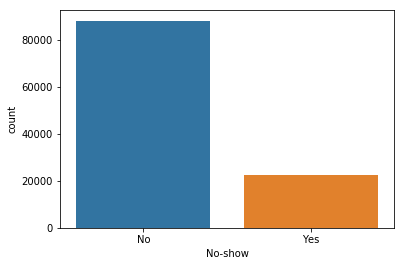

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data = research, x = 'No-show');

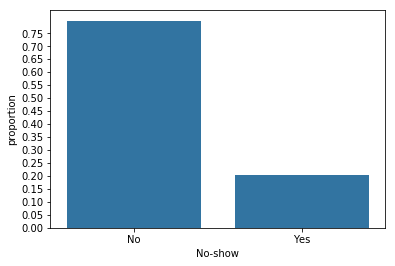

In [8]:
r1 = research.shape[0]
maxr = research['No-show'].value_counts().max()
max_prop = maxr / r1
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = research, x = 'No-show', color = base_color)
plt.yticks(tick_props * r1, tick_names)
plt.ylabel('proportion');

In [9]:
#In this section, we will seperate the number of no shows into those who showed up for their appointment and those who were a no show
no_shows = research[research[('No-show')] == 'Yes']
showed = research[research[('No-show')] == 'No']

print("There number of no show appointments is:", len(no_shows))
print('The number of people who showed up for their appointment is:', len(showed))
print('The percentage of people who are a no show is:',  round((len(no_shows) / len(showed)) * 100),'%')
print('The percentage of people who showed up for their appointment is:',  round((1 - len(no_shows) / len(showed)) * 100),'%')

There number of no show appointments is: 22319
The number of people who showed up for their appointment is: 88208
The percentage of people who are a no show is: 25 %
The percentage of people who showed up for their appointment is: 75 %


From this data, it shows that there is a really high percentage of no show appointments, 1 in every 4 patients is a no show. 

### No Show Appointments
>Next we will take a look at the data to see if sending a text reminder is effective in reducing the number of no shows. With this initial data, we will be able to establish a basis for further analysis.
>In this section, we will look at the relationship between those who were a no shows and wheather or not they received a text message. 

In [10]:
#Breaking up no shows in to whether or no they received a text message
no_show_no_text = no_shows[no_shows['SMS_received'] == 0]
no_show_with_text = no_shows[no_shows['SMS_received'] == 1]

#Finding total length of no shows
total_no_shows = len(no_shows)
#Determining the length of those who did not receive a text 
no_show_no_text_length = len(no_show_no_text)
# those who received a text
no_show_with_text_length = len(no_show_with_text)

#Calculating the percentage of no shows who did not receive a text
no_show_no_text_percent = round((no_show_no_text_length / total_no_shows)*100)

#Calulcating the percentage of no shows who did receive a text
no_show_with_text_percent = round((no_show_with_text_length / total_no_shows)*100)


print ('Number of No Shows With No Text:', no_show_no_text_length)
print ('Number of No Shows With With Text:', no_show_with_text_length)
print ('Percentage of No Shows With No Text Reminder:',no_show_no_text_percent,'%')
print ('Percentage of No Shows With With Text Reminder:',no_show_with_text_percent,'%')


Number of No Shows With No Text: 12535
Number of No Shows With With Text: 9784
Percentage of No Shows With No Text Reminder: 56 %
Percentage of No Shows With With Text Reminder: 44 %


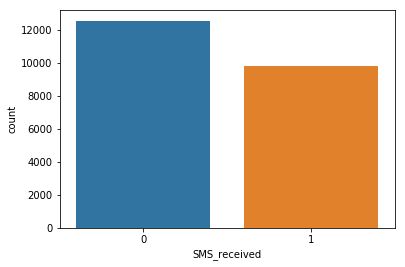

In [11]:
base_color = sb.color_palette()[0]
sb.countplot(data = no_shows, x = 'SMS_received')
plt.legend()

Upon review of the data, it shows that there is a 24% difference in those who were a no show and did not receive a text and those who were a no show and did receive a text message.

### Showed Appointments

In this section, we will take a look at the relationship between those who showed up for their appointments.

In [12]:
#Breaking up no shows in to whether or no they received a text message
show_no_text = showed[showed['SMS_received'] == 0]
show_with_text = showed[showed['SMS_received'] == 1]

#Calculating Lengths of tables
total_no_show_length = len(showed)
show_no_text_length = len(show_no_text)
show_with_text_length = len(show_with_text)

#Calculating Percentages of Tables
show_no_text_percent = round((show_no_text_length / total_no_show_length)*100)
show_with_text_percent = round((show_with_text_length / total_no_show_length)*100)

print('The total number of patients who showed up for their appointment is:', total_no_show_length)
print('The total number of patients who showed up without recieving a text message:', show_no_text_length)
print('The total number of patients who showed up after receiving a text reminder:', show_with_text_length)
print('The percent of patients who showed up without receiving a text:', show_no_text_percent, '%')
print('The percent of patients who showed up after receiving a text reminder', show_with_text_percent, '%')

The total number of patients who showed up for their appointment is: 88208
The total number of patients who showed up without recieving a text message: 62510
The total number of patients who showed up after receiving a text reminder: 25698
The percent of patients who showed up without receiving a text: 71 %
The percent of patients who showed up after receiving a text reminder 29 %


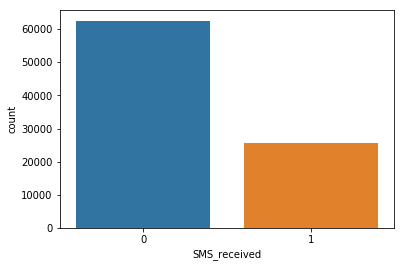

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data = showed, x = 'SMS_received')
plt.legend()

### Brief Analysis
>Overall the number of people who showed without receiving a text message is higher than those who did receive a text message. 
However, it is to believed that the number of people who receive a message since no show count is on avergae lower, it is safe to assume that this number would be much lower if a text was not sent.

### Research Question 2 (Which Age Group Has A Higher No Show Rate)
>The final section will determine the relationship between those who showed and didnt show up for their appointments based on the patients age range. This will help to determine which group has a higher likley hood of being a no show and thus be able to target these groups better if there is a relationship.

In [14]:
#We will first analize the age groups
research['Age'].groupby(research['Groups']).describe()[['count', 'mean', 'std', 'min', 'max']]


,count,mean,std,min,max
Groups,,,,,
Infant,22139.0,5.369348,4.168631,0.0,13.0
Teenager,6727.0,16.154006,1.389205,14.0,18.0
Young Adult,24137.0,27.077392,4.962661,19.0,35.0
Adult,30019.0,45.615677,5.843961,36.0,55.0
Elder Adult,27504.0,67.222186,8.968875,56.0,115.0


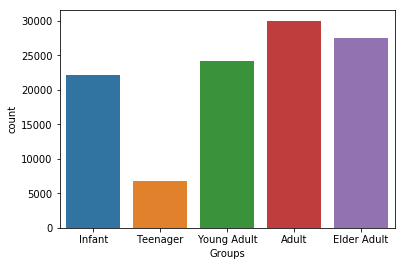

In [15]:
sb.countplot(data = research, x = 'Groups')

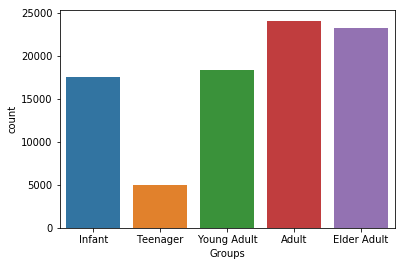

In [16]:
sb.countplot(data = showed, x = 'Groups');

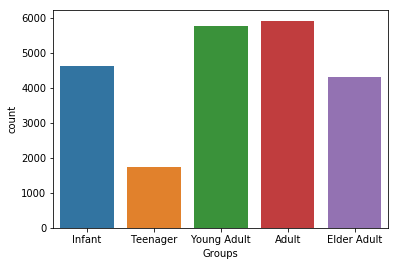

In [17]:
sb.countplot(data = no_shows, x = 'Groups');

In [18]:
#Received Text
received_text = medical[medical[('SMS_received')] == 1]
no_text = medical[medical[('SMS_received')] == 0]
print ('Number of people who did not receive a text:', len(no_text))
print ('Number of people who received a text:', len(received_text))
received_text['Age'].groupby(received_text['Groups']).describe()



Number of people who did not receive a text: 75045
Number of people who received a text: 35482


,count,mean,std,min,25%,50%,75%,max
Groups,,,,,,,,
Infant,6526.0,5.804934,4.128375,0.0,2.0,6.0,9.0,13.0
Teenager,1923.0,16.163807,1.383980,14.0,15.0,16.0,17.0,18.0
Young Adult,8301.0,27.001687,4.940733,19.0,23.0,27.0,31.0,35.0
Adult,10015.0,45.688867,5.875196,36.0,41.0,46.0,51.0,55.0
Elder Adult,8717.0,66.580704,8.566403,56.0,60.0,65.0,72.0,115.0


Adult          10015
Elder Adult     8717
Young Adult     8301
Infant          6526
Teenager        1923
Name: Groups, dtype: int64

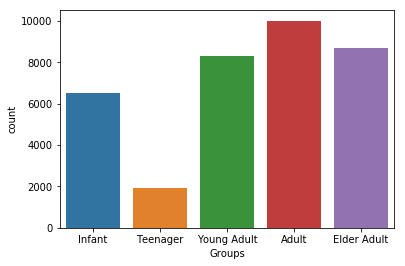

In [19]:
sb.countplot(data = (received_text), x = 'Groups')
received_text['Groups'].value_counts()

Adult          20004
Elder Adult    18787
Young Adult    15836
Infant         15613
Teenager        4804
Name: Groups, dtype: int64

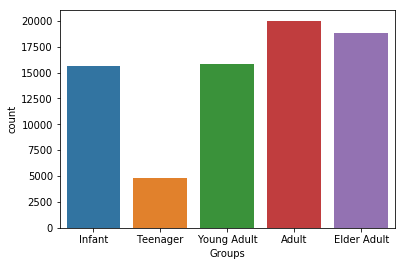

In [20]:
sb.countplot(data = (no_text), x = 'Groups');
no_text['Groups'].value_counts()

In [21]:
no_text['Age'].groupby(no_text['Groups']).describe()


,count,mean,std,min,25%,50%,75%,max
Groups,,,,,,,,
Infant,15613.0,5.187280,4.172019,0.0,1.0,5.0,9.0,13.0
Teenager,4804.0,16.150083,1.391416,14.0,15.0,16.0,17.0,18.0
Young Adult,15836.0,27.117075,4.973812,19.0,23.0,27.0,32.0,35.0
Adult,20004.0,45.579034,5.828062,36.0,40.0,46.0,51.0,55.0
Elder Adult,18787.0,67.519828,9.134543,56.0,60.0,65.0,73.0,115.0


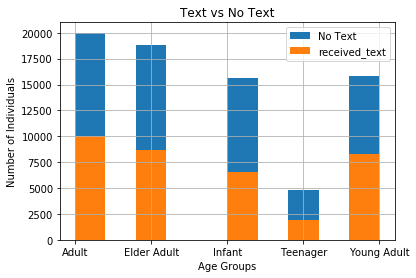

In [31]:
#Number of people who have received a text vs those who haven't 
no_text['Groups'].hist(label = 'No Text')
received_text['Groups'].hist(label = 'received_text')
plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals')
plt.title ('Text vs No Text')
plt.legend();

In [23]:
##Number of people who were a no show based and did not receive a text sorted into age buckts
no_text_no_show = no_text[no_text['No-show'] == 'Yes']
no_text_show = no_text[no_text['No-show'] == 'No']


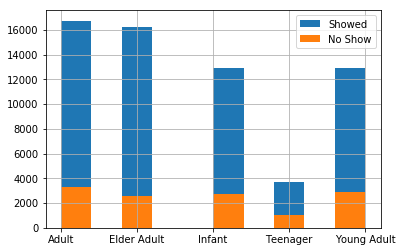

In [24]:
no_text_show['Groups'].hist(label = 'Showed')
no_text_no_show['Groups'].hist(label = 'No Show')
plt.legend();

In [25]:
no_text_no_show['Age'].groupby(no_text_no_show['Groups']).describe()


,count,mean,std,min,25%,50%,75%,max
Groups,,,,,,,,
Infant,2703.0,5.917129,4.255246,0.0,2.0,6.0,9.0,13.0
Teenager,1061.0,16.023563,1.390131,14.0,15.0,16.0,17.0,18.0
Young Adult,2931.0,26.929376,4.912212,19.0,23.0,27.0,31.0,35.0
Adult,3260.0,45.348466,5.789340,36.0,40.0,45.0,50.0,55.0
Elder Adult,2580.0,67.631008,9.550598,56.0,60.0,65.0,74.0,115.0


In [26]:
no_text_show['Age'].groupby(no_text_show['Groups']).describe()


,count,mean,std,min,25%,50%,75%,max
Groups,,,,,,,,
Infant,12910.0,5.034469,4.138283,0.0,1.0,4.0,8.0,13.0
Teenager,3743.0,16.185947,1.389871,14.0,15.0,16.0,17.0,18.0
Young Adult,12905.0,27.159706,4.986900,19.0,23.0,27.0,32.0,35.0
Adult,16744.0,45.623925,5.834684,36.0,40.0,46.0,51.0,55.0
Elder Adult,16207.0,67.502129,9.066729,56.0,60.0,65.0,73.0,115.0


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0